<div class="alert alert-info"; style="border-left: 7px solid blue">
<b>Student's comment</b>
    
**Making Business Decisions Based on Data - Student Project**

<div class="alert alert-info"; style="border-left: 7px solid blue">
<b>Student's comment</b>
    
**Project Description:**

**Context**

You are an analyst at a big online store. Together with the marketing department, you've compiled a list of hypotheses that may help boost revenue.
You need to prioritize these hypotheses, launch an A/B test, and analyze the results.

<div class="alert alert-info"; style="border-left: 7px solid blue">
<b>Student's comment</b>
    
**Project Description:**

**Description of the data**

Make sure to preprocess the data. There might be mistakes in the original datasets; for example, some of the visitors might have gotten into both group A and group B.

In [1]:
import pandas as pd
import numpy as np
import math
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
import datetime as dt
import scipy.stats as stats
from scipy.stats import ttest_ind

In [2]:
hypotheses_us = pd.read_csv('/datasets/hypotheses_us.csv')
pd.set_option('display.max_colwidth', None)

In [3]:
hypotheses_us['Data'] = hypotheses_us['Hypothesis;Reach;Impact;Confidence;Effort']
hypotheses_us

,Hypothesis;Reach;Impact;Confidence;Effort,Data
0,Add two new channels for attracting traffic. This will bring 30% more users;3;10;8;6,Add two new channels for attracting traffic. This will bring 30% more users;3;10;8;6
1,Launch your own delivery service. This will shorten delivery time;2;5;4;10,Launch your own delivery service. This will shorten delivery time;2;5;4;10
2,Add product recommendation blocks to the store's site. This will increase conversion and average purchase size;8;3;7;3,Add product recommendation blocks to the store's site. This will increase conversion and average purchase size;8;3;7;3
3,Change the category structure. This will increase conversion since users will find the products they want more quickly;8;3;3;8,Change the category structure. This will increase conversion since users will find the products they want more quickly;8;3;3;8
4,Change the background color on the main page. This will increase user engagement;3;1;1;1,Change the background color on the main page. This will increase user engagement;3;1;1;1
5,Add a customer review page. This will increase the number of orders;3;2;2;3,Add a customer review page. This will increase the number of orders;3;2;2;3
6,Show banners with current offers and sales on the main page. This will boost conversion;5;3;8;3,Show banners with current offers and sales on the main page. This will boost conversion;5;3;8;3
7,Add a subscription form to all the main pages. This will help you compile a mailing list;10;7;8;5,Add a subscription form to all the main pages. This will help you compile a mailing list;10;7;8;5
8,Launch a promotion that gives users discounts on their birthdays;1;9;9;5,Launch a promotion that gives users discounts on their birthdays;1;9;9;5


<div class="alert alert-info"; style="border-left: 7px solid blue">
<b>Student's comment</b>
    
By looking at the hypotheses_us dataframe, we see that all the info is in one column. We will create a new dataframe which will contain all the info in separate columns

In [4]:
# split the 'Data' column into five new columns
split_data = hypotheses_us['Data'].str.split(';', n=4, expand=True)
split_data.columns = ['Hypothesis', 'Reach', 'Impact', 'Confidence', 'Effort']

# create a new dataframe with the split data and the new column names
new_df = pd.concat([split_data], axis=1)

# print the new dataframe
new_df



,Hypothesis,Reach,Impact,Confidence,Effort
0,Add two new channels for attracting traffic. This will bring 30% more users,3,10,8,6
1,Launch your own delivery service. This will shorten delivery time,2,5,4,10
2,Add product recommendation blocks to the store's site. This will increase conversion and average purchase size,8,3,7,3
3,Change the category structure. This will increase conversion since users will find the products they want more quickly,8,3,3,8
4,Change the background color on the main page. This will increase user engagement,3,1,1,1
5,Add a customer review page. This will increase the number of orders,3,2,2,3
6,Show banners with current offers and sales on the main page. This will boost conversion,5,3,8,3
7,Add a subscription form to all the main pages. This will help you compile a mailing list,10,7,8,5
8,Launch a promotion that gives users discounts on their birthdays,1,9,9,5


In [5]:
new_df['Reach'] = new_df['Reach'].astype('int64')
new_df['Impact'] = new_df['Impact'].astype('int64')
new_df['Confidence'] = new_df['Confidence'].astype('int64')
new_df['Effort'] = new_df['Effort'].astype('int64')

In [6]:
orders = pd.read_csv('/datasets/orders_us.csv')
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   transactionId  1197 non-null   int64  
 1   visitorId      1197 non-null   int64  
 2   date           1197 non-null   object 
 3   revenue        1197 non-null   float64
 4   group          1197 non-null   object 
dtypes: float64(1), int64(2), object(2)
memory usage: 46.9+ KB


In [7]:
orders = orders.rename(columns={'transactionId': 'transaction_id', 'visitorId':'visitor_id'})
orders['date'] = pd.to_datetime(orders['date'], format="%Y.%m.%d")
orders

,transaction_id,visitor_id,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.4,B
1,2804400009,3642806036,2019-08-15,15.2,B
2,2961555356,4069496402,2019-08-15,10.2,A
3,3797467345,1196621759,2019-08-15,155.1,B
4,2282983706,2322279887,2019-08-15,40.5,B
...,...,...,...,...,...
1192,2662137336,3733762160,2019-08-14,100.8,B
1193,2203539145,370388673,2019-08-14,50.1,A
1194,1807773912,573423106,2019-08-14,165.3,A
1195,1947021204,1614305549,2019-08-14,5.5,A


In [8]:
visits = pd.read_csv('/datasets/visits_us.csv')
visits

,date,group,visits
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756
...,...,...,...
57,2019-08-27,B,720
58,2019-08-28,B,654
59,2019-08-29,B,531
60,2019-08-30,B,490


In [9]:
visits['date'] = pd.to_datetime(visits['date'], format="%Y.%m.%d")
visits

,date,group,visits
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756
...,...,...,...
57,2019-08-27,B,720
58,2019-08-28,B,654
59,2019-08-29,B,531
60,2019-08-30,B,490


<div class="alert alert-info"; style="border-left: 7px solid blue">
<b>Student's comment</b>
    
Now that we've uploaded the orders and visits dataframes, changed column names and date types, let's check to see if there are any duplicates.

In [10]:
print(orders.duplicated().sum())
print(visits.duplicated().sum())

0
0


<div class="alert alert-info"; style="border-left: 7px solid blue">
<b>Student's comment</b>
    
No duplictaes in our data. We can now proceed the to the project itself after we've finished with the data preprocessing.

<div class="alert alert-info"; style="border-left: 7px solid blue">
<b>Student's comment</b>
    
**Part 1. Prioritizing Hypotheses.**

The file hypotheses_us.csv contains nine hypotheses on boosting an online store's revenue with Reach, Impact, Confidence, and Effort specified for each.
The task is to:
    
*Apply the ICE framework to prioritize hypotheses. Sort them in descending order of priority.
    
*Apply the RICE framework to prioritize hypotheses. Sort them in descending order of priority.
    
*Show how the prioritization of hypotheses changes when you use RICE instead of ICE. Provide an explanation for the changes.


In [11]:
new_df['ICE'] = (new_df['Impact'] * new_df['Confidence']) / new_df['Effort']
new_df['ICE'].sort_values(ascending=False)

8    16.200000
0    13.333333
7    11.200000
6     8.000000
2     7.000000
1     2.000000
5     1.333333
3     1.125000
4     1.000000
Name: ICE, dtype: float64

In [12]:
new_df['RICE'] = (new_df['Impact'] * new_df['Confidence'] * new_df['Reach']) / new_df['Effort']
new_df['RICE'].sort_values(ascending=False)

7    112.0
2     56.0
0     40.0
6     40.0
8     16.2
3      9.0
1      4.0
5      4.0
4      3.0
Name: RICE, dtype: float64

In [13]:
new_df

,Hypothesis,Reach,Impact,Confidence,Effort,ICE,RICE
0,Add two new channels for attracting traffic. This will bring 30% more users,3,10,8,6,13.333333,40.0
1,Launch your own delivery service. This will shorten delivery time,2,5,4,10,2.000000,4.0
2,Add product recommendation blocks to the store's site. This will increase conversion and average purchase size,8,3,7,3,7.000000,56.0
3,Change the category structure. This will increase conversion since users will find the products they want more quickly,8,3,3,8,1.125000,9.0
4,Change the background color on the main page. This will increase user engagement,3,1,1,1,1.000000,3.0
5,Add a customer review page. This will increase the number of orders,3,2,2,3,1.333333,4.0
6,Show banners with current offers and sales on the main page. This will boost conversion,5,3,8,3,8.000000,40.0
7,Add a subscription form to all the main pages. This will help you compile a mailing list,10,7,8,5,11.200000,112.0
8,Launch a promotion that gives users discounts on their birthdays,1,9,9,5,16.200000,16.2


<div class="alert alert-info"; style="border-left: 7px solid blue">
<b>Student's comment</b>
    
By using ICE to prioritize, we see that hypotheses 8,0 and 7 are the preferred options.
By using RICE to prioritze, we see that hypotheses 7,2,0 and 6 are the preferred options.
    
By acknowledging the reach parameter, we see that hypothesis 8 falls in priority, even though its score remains the same. On the other side, we see the significant rise of hypothesis 2.
The reach parameter helps us confirm that hypotheses 0 and 7 should be prioritized, as they also ranked high without its effect.
    
After comparing RICE scores with the actual hypothesis, it makes perfect sense that the top 4 hypotheses are the ones that make the most sense business-wise, as they seem to be the more logical ways to help improve our business.

<div class="alert alert-info"; style="border-left: 7px solid blue">
<b>Student's comment</b>
    
**Part 2. A/B Test Analysis**

You carried out an A/B test and got the results described in the files orders_us.csv and visits_us.csv.
    
**Task**
    
Analyze the A/B test:
    
1. Graph cumulative revenue by group. Make conclusions and conjectures.
2. Graph cumulative average order size by group. Make conclusions and conjectures.
3. Graph the relative difference in cumulative average order size for group B compared with group A. Make conclusions and conjectures.
4. Calculate each group's conversion rate as the ratio of orders to the number of visits for each day. Plot the daily conversion rates of the two groups and describe the difference. Draw conclusions and make conjectures.
5. Plot a scatter chart of the number of orders per user. Make conclusions and conjectures.
6. Calculate the 95th and 99th percentiles for the number of orders per user. Define the point at which a data point becomes an anomaly.
7. Plot a scatter chart of order prices. Make conclusions and conjectures.
8. Calculate the 95th and 99th percentiles of order prices. Define the point at which a data point becomes an anomaly.
9. Find the statistical significance of the difference in conversion between the groups using the raw data. Make conclusions and conjectures.
10. Find the statistical significance of the difference in average order size between the groups using the raw data. Make conclusions and conjectures.
11. Find the statistical significance of the difference in conversion between the groups using the filtered data. Make conclusions and conjectures.
12. Find the statistical significance of the difference in average order size between the groups using the filtered data. Make conclusions and conjectures.
13. Make a decision based on the test results. The possible decisions are: 1. Stop the test, consider one of the groups the leader. 2. Stop the test, conclude that there is no difference between the groups. 3. Continue the test.


In [14]:
orders

,transaction_id,visitor_id,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.4,B
1,2804400009,3642806036,2019-08-15,15.2,B
2,2961555356,4069496402,2019-08-15,10.2,A
3,3797467345,1196621759,2019-08-15,155.1,B
4,2282983706,2322279887,2019-08-15,40.5,B
...,...,...,...,...,...
1192,2662137336,3733762160,2019-08-14,100.8,B
1193,2203539145,370388673,2019-08-14,50.1,A
1194,1807773912,573423106,2019-08-14,165.3,A
1195,1947021204,1614305549,2019-08-14,5.5,A


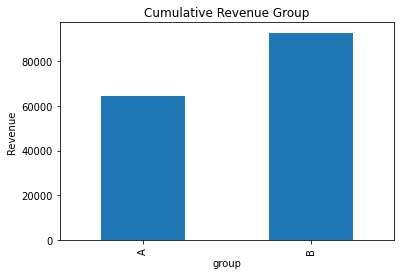

In [15]:
orders_grouped = orders.groupby('group').agg({'revenue' : 'sum'})
orders_grouped.plot(kind='bar', title='Cumulative Revenue Group', legend=False)
plt.ylabel('Revenue')
plt.show()

In [16]:
print(orders['group'].value_counts())
orders_grouped

B    640
A    557
Name: group, dtype: int64


,revenue
group,
A,64554.9
B,92840.6


<div class="alert alert-info"; style="border-left: 7px solid blue">
<b>Student's comment</b>
    
By looking at cumulative revenue per group, we see that group B spent more than group A (92840.6 comapred to 64554.9).
The difference could be due to the fact that group B had 83 more orders (640 compared to 557), so our sample size isn't equal. 

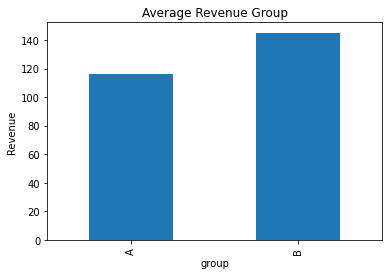

In [17]:
average_orders_grouped = orders.groupby('group').agg({'revenue' : 'mean'})
average_orders_grouped.plot(kind='bar', title='Average Revenue Group', legend=False)
plt.ylabel('Revenue')
plt.show()

In [18]:
average_orders_grouped

,revenue
group,
A,115.897487
B,145.063437


<div class="alert alert-info"; style="border-left: 7px solid blue">
<b>Student's comment</b>
    
By looking at average revenue per group, we see that group B spent more than group A (145.06 comapred to 115.89).
We would have expected that with group B having more orders, that the average would decrease. However, that is not the case. This leads us to belive that group B were bigger spenders (both total and on average), and now we will continue to explore the reason as to why this happened. 

In [19]:
visits

,date,group,visits
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756
...,...,...,...
57,2019-08-27,B,720
58,2019-08-28,B,654
59,2019-08-29,B,531
60,2019-08-30,B,490


In [20]:
orders

,transaction_id,visitor_id,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.4,B
1,2804400009,3642806036,2019-08-15,15.2,B
2,2961555356,4069496402,2019-08-15,10.2,A
3,3797467345,1196621759,2019-08-15,155.1,B
4,2282983706,2322279887,2019-08-15,40.5,B
...,...,...,...,...,...
1192,2662137336,3733762160,2019-08-14,100.8,B
1193,2203539145,370388673,2019-08-14,50.1,A
1194,1807773912,573423106,2019-08-14,165.3,A
1195,1947021204,1614305549,2019-08-14,5.5,A


In [21]:
df_ab = orders[orders['group'].isin(['A', 'B'])]

visitor_groups = df_ab.groupby('visitor_id')['group'].nunique()

visitors_in_multiple_groups = visitor_groups[visitor_groups > 1]

visitors_in_multiple_groups.count()

58

<div class="alert alert-info"; style="border-left: 7px solid blue">
<b>Student's comment</b>
    
We see that we have 58 users that appear in both groups. To resolve this issue, we will drop both rows with a duplicate visitor_id

In [22]:
orders_no_duplicates = orders.drop_duplicates(subset=['visitor_id'], keep=False)
orders_no_duplicates

,transaction_id,visitor_id,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.4,B
1,2804400009,3642806036,2019-08-15,15.2,B
3,3797467345,1196621759,2019-08-15,155.1,B
4,2282983706,2322279887,2019-08-15,40.5,B
5,182168103,935554773,2019-08-15,35.0,B
...,...,...,...,...,...
1191,3592955527,608641596,2019-08-14,255.7,B
1192,2662137336,3733762160,2019-08-14,100.8,B
1193,2203539145,370388673,2019-08-14,50.1,A
1194,1807773912,573423106,2019-08-14,165.3,A


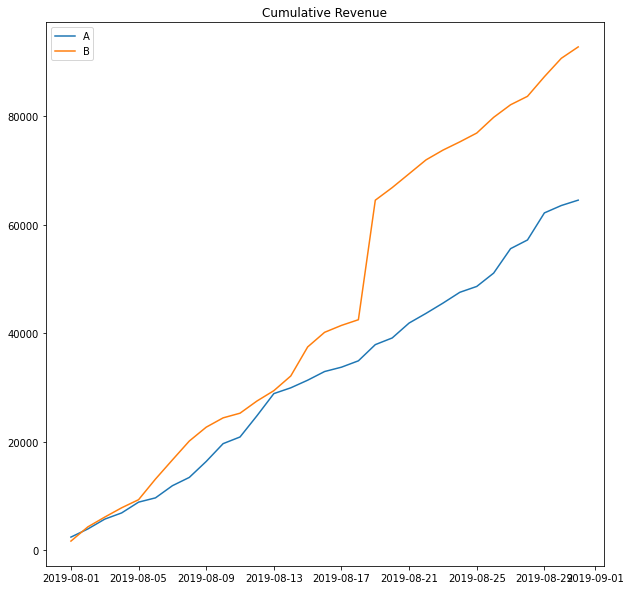

In [23]:
#orders['date'] = orders['date'].map(lambda x: dt.datetime.strptime(x, '%d/%m/%Y'))
#visits['date'] = visits['date'].map(lambda x: dt.datetime.strptime(x, '%d/%m/%Y'))

datesGroups = orders[['date', 'group']].drop_duplicates()

ordersAggregated = datesGroups.apply(
    lambda x: orders[
        np.logical_and(
            orders['date'] <= x['date'], orders['group'] == x['group']
        )
    ].agg(
        {
            'date': 'max',
            'group': 'max',
            'transaction_id': pd.Series.nunique,
            'visitor_id': pd.Series.nunique,
            'revenue': 'sum',
        }
    ),
    axis=1,
).sort_values(by=['date', 'group'])

visitsAggregated = datesGroups.apply(
    lambda x: visits[
        np.logical_and(
            visits['date'] <= x['date'], visits['group'] == x['group']
        )
    ].agg({'date': 'max', 'group': 'max', 'visits': 'sum'}),
    axis=1,
).sort_values(by=['date', 'group'])

cumulativeData = ordersAggregated.merge(
    visitsAggregated, left_on=['date', 'group'], right_on=['date', 'group']
)
cumulativeData.columns = [
    'date',
    'group',
    'transaction_id',
    'visitor_id',
    'revenue',
    'visits',
]

cumulativeRevenueA = cumulativeData[cumulativeData['group'] == 'A'][
    ['date', 'revenue', 'transaction_id']
]
cumulativeRevenueB = cumulativeData[cumulativeData['group'] == 'B'][
    ['date', 'revenue', 'transaction_id']
]

plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')
plt.legend()
plt.title('Cumulative Revenue')
plt.gcf().set_size_inches(10, 10)
plt.show()

<div class="alert alert-info"; style="border-left: 7px solid blue">
<b>Student's comment</b>
    
By looking at cumulative revenue per group, we see that group B spent more than group A (92840.6 comapred to 64554.9).
The difference could be due to the fact that group B had 83 more orders (640 compared to 557), so our sample size isn't equal.
We also see that the growth of group A is rather stable, while group B sees more spikes.

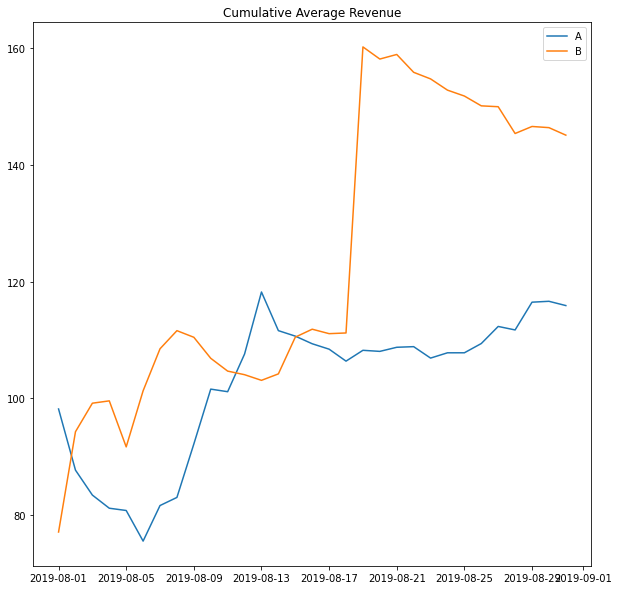

In [24]:
plt.plot(
    cumulativeRevenueA['date'],
    cumulativeRevenueA['revenue'] / cumulativeRevenueA['transaction_id'],
    label='A',
)
plt.plot(
    cumulativeRevenueB['date'],
    cumulativeRevenueB['revenue'] / cumulativeRevenueB['transaction_id'],
    label='B',
)
plt.legend()
plt.title('Cumulative Average Revenue')
plt.gcf().set_size_inches(10, 10)
plt.show()

<div class="alert alert-info"; style="border-left: 7px solid blue">
<b>Student's comment</b>
    
By looking at the average cumulative revenue per group, we still see that group B spent more than group A (145.06 comapred to 115.89).
We would have expected that with group B having more orders, that the average would decrease. However, that is not the case. This leads us to belive that group B were bigger spenders (both total and on average), and now we will continue to explore the reason as to why this happened.
We also see greater fluctuation with groub B, and a trend of decline in average revenue following its peak. Group A seems to have stabilized after enduring an early low.

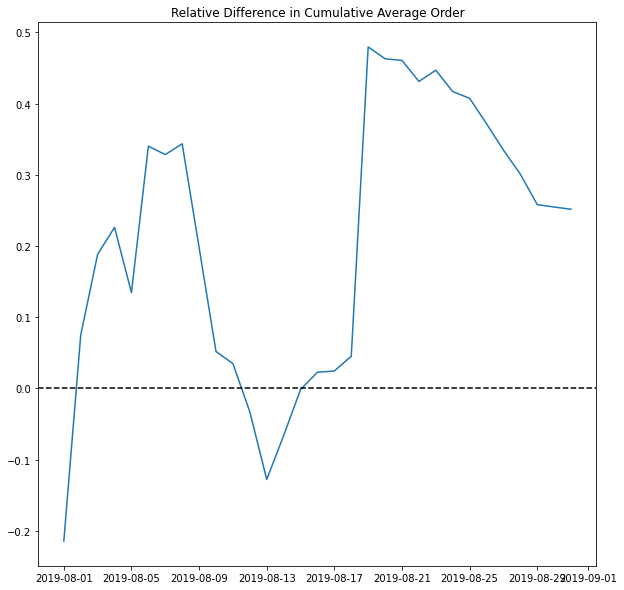

In [25]:

mergedCumulativeRevenue = cumulativeRevenueA.merge(
    cumulativeRevenueB,
    left_on='date',
    right_on='date',
    how='left',
    suffixes=['A', 'B'],
)

plt.plot(
    mergedCumulativeRevenue['date'],
    (mergedCumulativeRevenue['revenueB'] / mergedCumulativeRevenue['transaction_idB'])
    / (
        mergedCumulativeRevenue['revenueA']
        / mergedCumulativeRevenue['transaction_idA']
    )
    - 1,
)
plt.axhline(y=0, color='black', linestyle='--')
plt.title('Relative Difference in Cumulative Average Order')
plt.gcf().set_size_inches(10, 10)
plt.show()

<div class="alert alert-info"; style="border-left: 7px solid blue">
<b>Student's comment</b>
    
By looking at the relative difference in cumulative average revenue per group, we see some sudden and considerable changes. This could be the result of abnormaly large purchases.

In [26]:
cumulativeData

,date,group,transaction_id,visitor_id,revenue,visits
0,2019-08-01,A,24,20,2356.8,719
1,2019-08-01,B,21,20,1620.0,713
2,2019-08-02,A,44,38,3860.3,1338
3,2019-08-02,B,45,43,4243.8,1294
4,2019-08-03,A,68,62,5675.5,1845
...,...,...,...,...,...,...
57,2019-08-29,B,596,544,87343.0,17708
58,2019-08-30,A,545,493,63563.5,18037
59,2019-08-30,B,620,567,90736.3,18198
60,2019-08-31,A,557,503,64554.9,18736


In [27]:
cumulativeData['conversion'] = (
    cumulativeData['transaction_id'].count() / cumulativeData['visits'])

In [28]:
cumulativeData

,date,group,transaction_id,visitor_id,revenue,visits,conversion
0,2019-08-01,A,24,20,2356.8,719,0.086231
1,2019-08-01,B,21,20,1620.0,713,0.086957
2,2019-08-02,A,44,38,3860.3,1338,0.046338
3,2019-08-02,B,45,43,4243.8,1294,0.047913
4,2019-08-03,A,68,62,5675.5,1845,0.033604
...,...,...,...,...,...,...,...
57,2019-08-29,B,596,544,87343.0,17708,0.003501
58,2019-08-30,A,545,493,63563.5,18037,0.003437
59,2019-08-30,B,620,567,90736.3,18198,0.003407
60,2019-08-31,A,557,503,64554.9,18736,0.003309


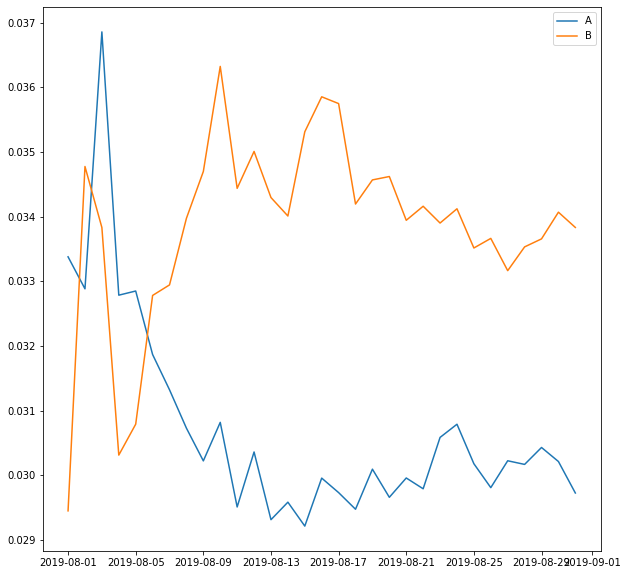

In [30]:
cumulativeData['conversion'] = cumulativeData['transaction_id']/cumulativeData['visits']

# selecting data on group A 
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

# selecting data on group B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

# plotting the graphs
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.gcf().set_size_inches(10, 10)
plt.legend()

<div class="alert alert-info"; style="border-left: 7px solid blue">
<b>Student's comment</b>
    
By looking at the conversion rate graph, we see that group A started out with a strong conversion rate, but then declined sharply and has been suffered from a very low conversion rate. On the other hand, group B suffered a steep decline as well (the major declines for both groups occured near 2019-08-03), but then rebounded with higher conversion rates. While it remained somewhat volatile, they were still mostly trending in a positive direction and significantly higher than those of group A.

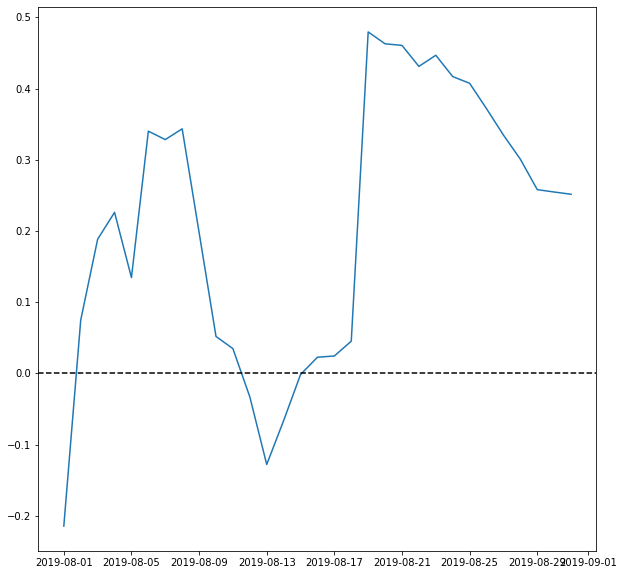

In [32]:
control=cumulativeData[cumulativeData['group']=='A']
test=cumulativeData[cumulativeData['group']=='B']

mergedCumulativeRevenue = control.merge(test, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

# plotting a relative difference graph for the average purchase sizes
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['transaction_idB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['transaction_idA'])-1)

# adding the X axis
plt.axhline(y=0, color='black', linestyle='--') 
plt.gcf().set_size_inches(10, 10)

<div class="alert alert-info"; style="border-left: 7px solid blue">
<b>Student's comment</b>
    
By looking at the relative difference between cumulative conversion rate graph, we see an overall positive trend, although it has two noticeable drops (2019-08-13 and 2019-08-25, with 2019-08-13 even showing a negative cumulative conversion), even though the graph continues to decline towards the end of our test period.

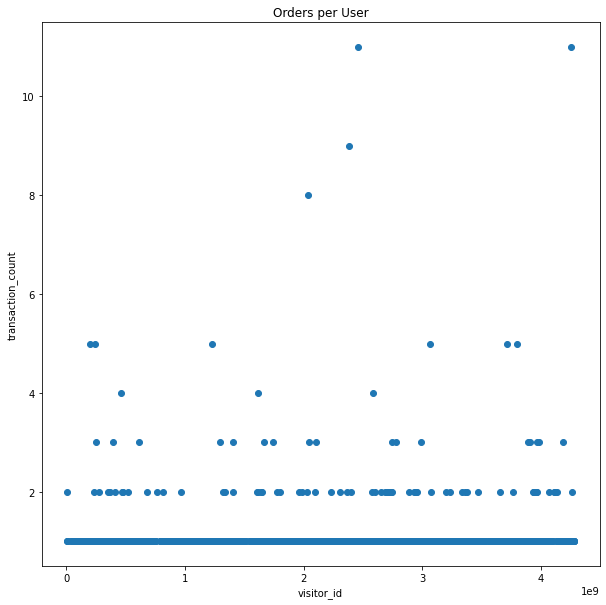

In [33]:
orders_per_user = orders.groupby('visitor_id')['transaction_id'].count()

plt.scatter(orders_per_user.index, orders_per_user.values)

plt.xlabel('visitor_id')
plt.ylabel('transaction_count')
plt.gcf().set_size_inches(10, 10)
plt.title('Orders per User')
plt.show()

<div class="alert alert-info"; style="border-left: 7px solid blue">
<b>Student's comment</b>
    
By looking at the scatter plot above, we see that most users placed 1 order, with several users placing 2, and sometimes 3 orders. The outliers are users who placed 4 or more orders.

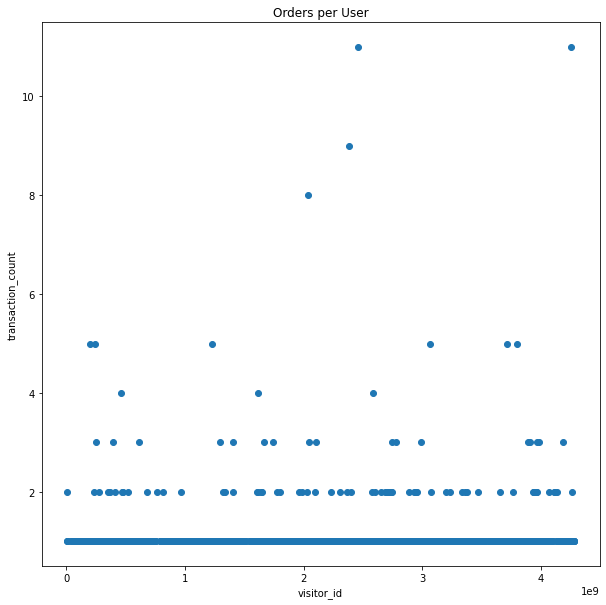

In [34]:
orders_per_user = orders.groupby('visitor_id')['transaction_id'].count()

plt.scatter(orders_per_user.index, orders_per_user.values)

plt.xlabel('visitor_id')
plt.ylabel('transaction_count')
plt.gcf().set_size_inches(10, 10)
plt.title('Orders per User')
plt.show()

In [35]:
pct_95 = orders_per_user.quantile(0.95)
pct_99 = orders_per_user.quantile(0.99)

print(f"The 95th percentile for the number of orders per user is {pct_95:.0f}")
print(f"The 99th percentile for the number of orders per user is {pct_99:.0f}")

The 95th percentile for the number of orders per user is 2
The 99th percentile for the number of orders per user is 4


<div class="alert alert-info"; style="border-left: 7px solid blue">
<b>Student's comment</b>
    
The percentiles confirm our conclusion from the scatter plot - 4 or more orders are an anamoly.

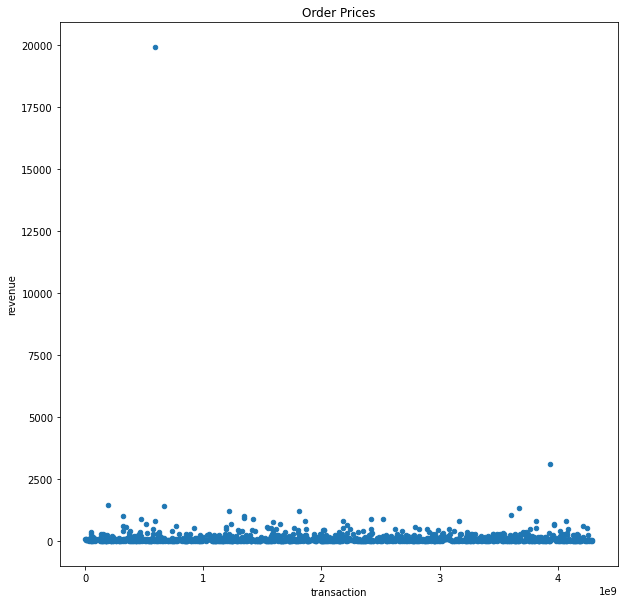

In [36]:
orders.plot(kind='scatter', x='transaction_id', y='revenue')




plt.xlabel('transaction')
plt.ylabel('revenue')
plt.gcf().set_size_inches(10, 10)
plt.title('Order Prices')
plt.show()

<div class="alert alert-info"; style="border-left: 7px solid blue">
<b>Student's comment</b>
    
By looking at the scatter plot above, we see that most orders (or revenue), are below 2500. 

In [37]:
pct_95 = orders['revenue'].quantile(0.95)
pct_99 = orders['revenue'].quantile(0.99)

print(f"The 95th percentile for the order price is {pct_95:.0f}")
print(f"The 99th percentile for the order price is {pct_99:.0f}")

The 95th percentile for the order price is 436
The 99th percentile for the order price is 901


<div class="alert alert-info"; style="border-left: 7px solid blue">
<b>Student's comment</b>
    
The percentiles show us that the difference between the 95th and 99th percentile is nearly double, and considering the density of the orders as seen in the scatter plot, the 99th percentile seems to be reasonably defined as an anomaly.

In [38]:
cumulativeData

,date,group,transaction_id,visitor_id,revenue,visits,conversion
0,2019-08-01,A,24,20,2356.8,719,0.033380
1,2019-08-01,B,21,20,1620.0,713,0.029453
2,2019-08-02,A,44,38,3860.3,1338,0.032885
3,2019-08-02,B,45,43,4243.8,1294,0.034776
4,2019-08-03,A,68,62,5675.5,1845,0.036856
...,...,...,...,...,...,...,...
57,2019-08-29,B,596,544,87343.0,17708,0.033657
58,2019-08-30,A,545,493,63563.5,18037,0.030216
59,2019-08-30,B,620,567,90736.3,18198,0.034070
60,2019-08-31,A,557,503,64554.9,18736,0.029729


In [39]:
cr_pct_95 = cumulativeData['revenue'].quantile(0.95)
cr_pct_99 = cumulativeData['revenue'].quantile(0.99)

print(f"The 95th percentile for the cumulative revenue is {cr_pct_95:.0f}")
print(f"The 99th percentile for the cumulative revenue is {cr_pct_99:.0f}")

The 95th percentile for the cumulative revenue is 83641
The 99th percentile for the cumulative revenue is 91557


<div class="alert alert-info"; style="border-left: 7px solid blue">
<b>Student's comment</b>

Here we wil ldefine the null and alternative hypothesis:

The null hypothesis: There is no significant difference between groups A and B.

The alternative hypothesis: There is a significant difference between groups A and B.

In [40]:
#visits['date'] = visits['date'].map(
    #lambda x: dt.datetime.strptime(x, '%d/%m/%Y')
#)

#orders['date'] = orders['date'].map(
    #lambda x: dt.datetime.strptime(x, '%d/%m/%Y')
#)

ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)
ordersByUsersA.columns = ['visitor_id', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)
ordersByUsersB.columns = ['visitor_id', 'orders']

sampleA = pd.concat(
    [
        ordersByUsersA['orders'],
        pd.Series(
            0,
            index=np.arange(
                visits[visits['group'] == 'A']['visits'].sum()
                - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)
sampleB = pd.concat(
    [
        ordersByUsersB['orders'],
        pd.Series(
            0,
            index=np.arange(
                visits[visits['group'] == 'B']['visits'].sum()
                - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

print('{0:.5f}'.format(stats.mannwhitneyu(sampleA, sampleB)[1]))
print('{0:.3f}'.format(sampleB.mean() / sampleA.mean() - 1))


0.01679
0.138


<div class="alert alert-info"; style="border-left: 7px solid blue">
<b>Student's comment</b>
    
We see that the p-value is lower than 0.05, so we can reject the null hypothesis. From the raw data we can see that there is a significant difference between the conversion rates.
The relative conversion gain for group B comapred with group A is 13.8%.

In [47]:
cumulativeData['conversion'] = cumulativeData['transaction_id']/cumulativeData['visits']

# selecting data on group A 
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

# selecting data on group B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

stat, pval = ttest_ind(cumulativeDataA['conversion'], cumulativeDataB['conversion'])
print('t-statistic:', stat)
print('p-value:', pval)

t-statistic: 0.6915246773264736
p-value: 0.25165300678182456


<div class="alert alert-info"; style="border-left: 7px solid blue">
<b>Student's comment</b>
    
We see that the p-value is much greater than 0.05, so we can't reject the null hypothesis. From the raw data we can see that there is a significant difference between the conversion rates.
The t-statistic figure shows us a significant difference between the two groups, which further confirms us not rejecting the null hypothesis.

In [42]:
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)
ordersByUsersA.columns = ['visitor_id', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)
ordersByUsersB.columns = ['visitor_id', 'orders']

usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > 2]['visitor_id'],
        ordersByUsersB[ordersByUsersB['orders'] > 2]['visitor_id'],
    ],
    axis=0,
)
usersWithExpensiveOrders = orders[orders['revenue'] > 901]['visitor_id']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)

In [43]:
ordersByUsersA

,visitor_id,orders
0,8300375,1
1,11685486,1
2,54447517,1
3,66685450,1
4,78758296,1
...,...,...
498,4243832526,1
499,4256040402,7
500,4259830713,1
501,4266935830,1


In [44]:
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['visitor_id'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                visits[visits['group'] == 'A']['visits'].sum()
                - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['visitor_id'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                visits[visits['group'] == 'B']['visits'].sum()
                - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

print(
    "{0:.5f}".format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1])
)
print("{0:.3f}".format(sampleBFiltered.mean() / sampleAFiltered.mean() - 1))


0.01007
0.174


<div class="alert alert-info"; style="border-left: 7px solid blue">
<b>Student's comment</b>
    
We see that the relative difference in conversion is almost 20%, which causes us to belive that it is significant (which contrasts some of our earlier methods).

In [45]:
print(
    "{0:.3f}".format(
        stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1]
    )
)

print(
    "{0:.3f}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    )
)

0.845
-0.020


<div class="alert alert-info"; style="border-left: 7px solid blue">
<b>Student's comment</b>
    
We see that the p-value is quite significant, meaning that we can't reject the null hypothesis.

<div class="alert alert-info"; style="border-left: 7px solid blue">
<b>Student's comment</b>
    
**Conclusion**
    
We will stop the test and deduce that group B is the leader. Not only are their cumulative metrics and results higher than group A, but so are their relative results with filtered data.